### Case 1: X1 -> X2, X2 -> X3

In [89]:
import copy
import numpy as np

n_task = 3
prob = [0.3, 1, 3]
l = np.ones(n_task,)
learning_rate = 1e-3

lr = learning_rate
n_steps2 = 5000

ls = []


for i in range(n_steps2):
    
    c = np.ones(3,)
    alpha = 0.0001
    c[1] = (1-l[0]**(alpha))
    c[2] = (1-l[1]**(alpha))
    fg = c * prob * l
    fg_norm = fg/(np.sum(fg) + 1e-3)
    l -= lr * fg_norm
    l = np.maximum(l, 0.)
    #l = np.exp(-lr*prob/(np.sum(fg)+0.01)) * l
    ls.append(copy.deepcopy(l))
    
ls = np.array(ls)

(0.0, 5000.0)

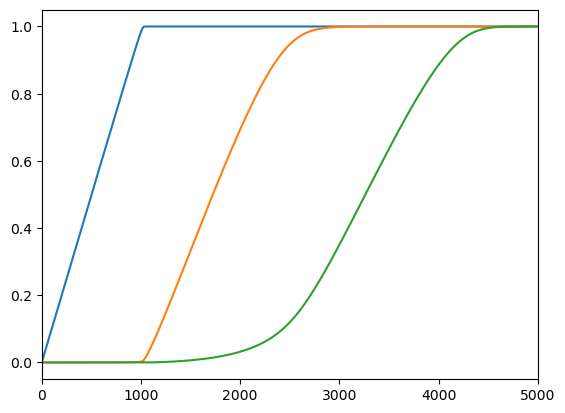

In [90]:
import matplotlib.pyplot as plt

for i in range(n_task):
    plt.plot(1-ls[:,i])
    
plt.xlim(0,5000)

In [91]:
np.savez('./results/hier_1', 1-ls)

### Case 2: X1 and X2 -> X5, X3 and X4 -> X6, X5 and X6 -> X7

In [92]:
import copy
import numpy as np

n_task = 7
prob = [1,0.1,2,0.2,1,1,1]
l = np.ones(n_task,)
learning_rate = 1e-3

lr = learning_rate
n_steps2 = 20000

ls = []


for i in range(n_steps2):
    
    c = np.ones(7,)
    alpha = 0.001
    c[4] = (1-l[0]**(alpha)) * (1-l[1]**(alpha))
    c[5] = (1-l[2]**(alpha)) * (1-l[3]**(alpha))
    c[6] = (1-l[4]**(alpha)) * (1-l[5]**(alpha))
    
    fg = c * prob * l
    fg_norm = fg/(np.sum(fg) + 1e-3)
    l -= lr * fg_norm
    l = np.maximum(l, 0.)
    #l = np.exp(-lr*prob/(np.sum(fg)+0.01)) * l
    ls.append(copy.deepcopy(l))
    
ls = np.array(ls)

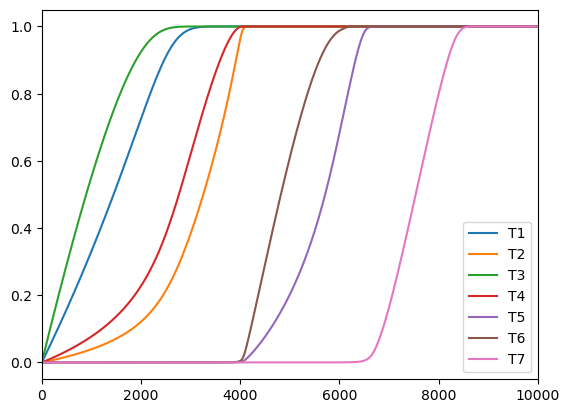

In [93]:
for i in range(n_task):
    plt.plot(1-ls[:,i])
    
plt.xlim(0,10000)
plt.legend([f'T{i}' for i in range(1,8)], loc='lower right')

In [94]:
np.savez('./results/hier_2', 1-ls)

### Case 3: X1 and X2 -> X5, X3 or X4 -> X6, X5 or X6 -> X7

In [95]:
import copy
import numpy as np

n_task = 7
prob = [0.1,0.01,2,0.2,1,1,1]
l = np.ones(n_task,)
learning_rate = 1e-3

lr = learning_rate
n_steps2 = 20000

ls = []


for i in range(n_steps2):
    
    c = np.ones(7,)
    alpha = 0.001
    c[4] = (1-l[0]**(alpha)) * (1-l[1]**(alpha))
    c[5] = np.maximum(1-l[2]**(alpha), 1-l[3]**(alpha))
    c[6] = np.maximum((1-l[4]**(alpha)), (1-l[5]**(alpha)))
    
    fg = c * prob * l
    fg_norm = fg/(np.sum(fg) + 1e-3)
    l -= lr * fg_norm
    l = np.maximum(l, 0.)
    #l = np.exp(-lr*prob/(np.sum(fg)+0.01)) * l
    ls.append(copy.deepcopy(l))
    
ls = np.array(ls)

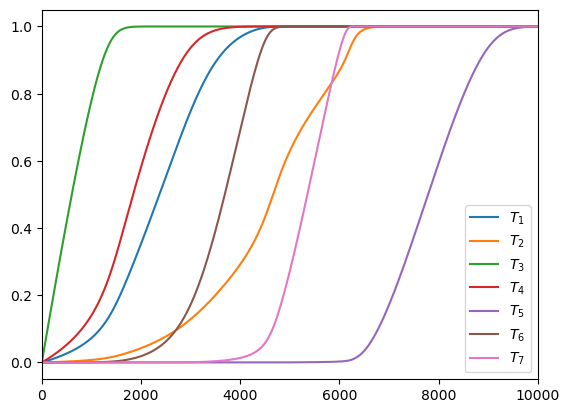

In [96]:
for i in range(n_task):
    plt.plot(1-ls[:,i])
    
plt.xlim(0,10000)
plt.legend([f'$T_{i}$' for i in range(1,8)], loc='lower right')

In [97]:
np.savez('./results/hier_3', 1-ls)

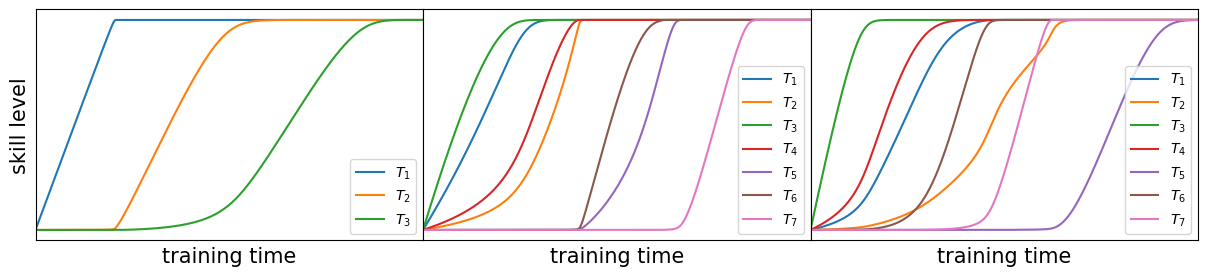

In [117]:
plt.figure(figsize=(15,3))


plt.subplot(1,3,1)
data = dict(np.load('./results/hier_1.npz'))['arr_0']

for i in range(3):
    plt.plot(data[:,i])
    
plt.xlim(0,5000)
plt.xticks([])
plt.yticks([])
plt.xlabel('training time', fontsize=15)
plt.ylabel('skill level', fontsize=15)
plt.legend([f'$T_{i}$' for i in range(1,4)], loc='lower right')

plt.subplot(1,3,2)
data = dict(np.load('./results/hier_2.npz'))['arr_0']

for i in range(7):
    plt.plot(data[:,i])
    
plt.xlim(0,10000)
plt.xticks([])
plt.yticks([])
plt.xlabel('training time', fontsize=15)
plt.legend([f'$T_{i}$' for i in range(1,8)], loc='lower right')

plt.subplot(1,3,3)
data = dict(np.load('./results/hier_3.npz'))['arr_0']

for i in range(7):
    plt.plot(data[:,i])
    
plt.xlim(0,10000)
plt.xticks([])
plt.yticks([])
plt.xlabel('training time', fontsize=15)
plt.legend([f'$T_{i}$' for i in range(1,8)], loc='lower right')

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./plot/hier_eff.pdf', bbox_inches='tight')